# Recommender 2, Using SVD

### Preprocessing the same as Recommender 1

In [1]:
import pandas as pd
import numpy as np
from scipy import sparse
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('./Data/1970-2020_tracks_cleaned')
df.head()

df['track_name'] = df['track_name']+', '+df['artist_name']
df['track_name'] = df['track_name'].str.lower()

df.set_index('track_name', inplace=True)

df = df[df['year'] >= 2000]

df.shape

df = df[~df.index.duplicated(keep='last')]

df.shape

numerical_df = df.drop(columns=['artist_name', 'uri'])

ss = StandardScaler()
numerical_df_scaled = ss.fit_transform(numerical_df)

### Singular Value Decomposition (SVD)
- SVD is dimensionality reduction technique related to Principle Component Analysis (PCA). SVD takes any shaped matrix M and factorizes it into the product of 3 separate matrixes. This simplifies the maxtrix to include only features important to aproximate the original matrix.\
- SVD can thus be used as a data compression technique. This is relevant since our currennt dataset takes a large amount of physical memory.

With n=10, we are reducing our columns from 15 to 10.

In [2]:
SVD = TruncatedSVD(n_components=10, random_state=42)
svd_matrix = SVD.fit_transform(numerical_df_scaled)
svd_matrix.shape

(38775, 10)

### Plotting cumulative variance explained by each component

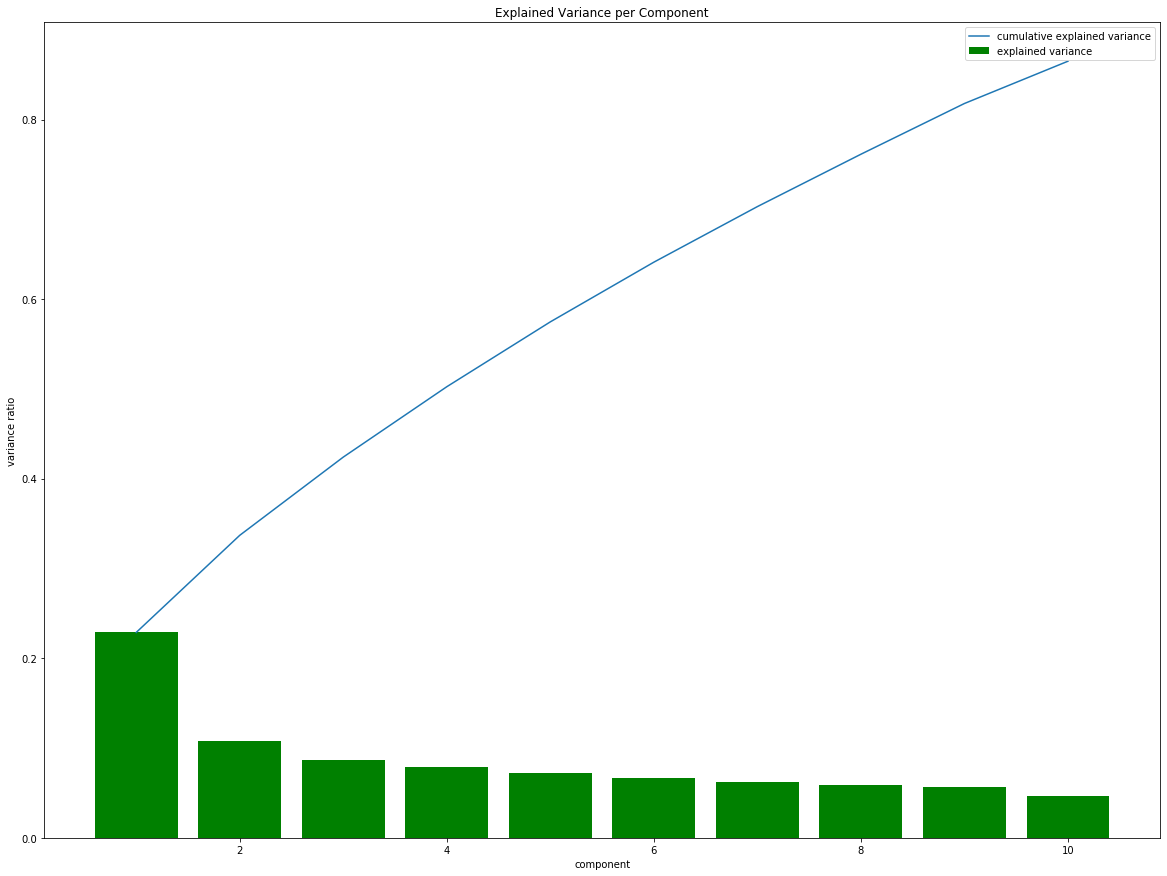

In [4]:
fig = plt.figure(figsize=(20,15))

plt.bar(np.array(range(10))+1, 
        SVD.explained_variance_ratio_, 
        color='g', 
        label='explained variance')
plt.plot(np.array(range(10))+1, 
         np.cumsum(SVD.explained_variance_ratio_), 
         label='cumulative explained variance')
plt.legend()
plt.xlabel('component')
plt.ylabel('variance ratio')
plt.title("Explained Variance per Component")
plt.savefig("./Assets/explained_variance.png")

In [15]:
component_names = ["component_"+str(i+1) for i in range(svd_matrix.shape[1])]
svd = pd.DataFrame(svd_matrix,
                      columns=component_names)

In [16]:
svd.insert(0, 'track_name', df.index)
svd.set_index('track_name', inplace=True)
svd.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
track_name,,,,,,,,,,
"bitch please ii, eminem",-1.734698,-0.280060,-1.567228,-0.482390,0.982692,1.468866,0.801477,0.597324,0.268884,0.381205
"papa was a rollin' stone - single version, the temptations",0.107901,-0.327820,-1.745616,1.676831,-1.679010,0.911395,-0.042200,1.031143,1.090756,1.602407
"shape of my heart, backstreet boys",-0.931237,0.130349,-0.313169,-0.357471,-0.811825,0.257639,1.110801,-1.241244,0.513980,-0.197849
"dig, mudvayne",-1.815306,0.630873,0.830635,1.507607,-1.261224,-0.742073,-0.014041,-0.474777,-0.545944,-0.915923
"hold on loosely, 38 special",-1.210917,1.154088,-0.970413,-0.429379,-1.118764,-0.038555,0.347801,-0.378972,0.835600,0.272029


In [17]:
cs2 = cosine_similarity(svd, svd)

In [18]:
recommender2 = pd.DataFrame(cs2, columns=svd.index, index=svd.index)

In [20]:
def recommend2(search):

    for track in df.loc[df.index.str.contains(search)].sort_values(by ='popularity', ascending = False).index:
        print(track)
        print('')
        print('10 closest songs')
        print('')
        print(recommender2[track].sort_values(ascending = False)[1:11])
        print('')
        print('*******************************************************************************************')
        print('')

In [21]:
recommend2('closer, the chainsmokers')

closer, the chainsmokers

10 closest songs

track_name
mi verdad (feat. shakira), maná                                               0.975497
just the same, charlotte lawrence                                             0.967467
fallin' all in you, shawn mendes                                              0.966304
virgen, adolescent's orquesta                                                 0.965484
bloom, black party                                                            0.963628
fuck, i'm lonely (with anne-marie) - from “13 reasons why: season 3”, lauv    0.957221
flor pálida, marc anthony                                                     0.957066
pasos de cero, pablo alborán                                                  0.955516
wildfire, john mayer                                                          0.950483
something i need, onerepublic                                                 0.949932
Name: closer, the chainsmokers, dtype: float64

***************************

In [22]:
def get_features(song):
    return df.loc[song]

In [23]:
get_features('closer, the chainsmokers')

artist_name                             The Chainsmokers
year                                                2016
key                                                    8
tempo                                             94.962
mode                                                   1
time_signature                                         4
duration_ms                                       245507
popularity                                            61
loudness                                          -5.597
acousticness                                       0.415
danceability                                       0.736
energy                                             0.541
instrumentalness                                       0
liveness                                            0.11
speechiness                                       0.0297
valence                                            0.662
uri                 spotify:track:7crMiinWx373rNBZBaVske
Name: closer, the chainsmokers,